 # <font size= 1> <font color='FFFFFF'>Mapas autoorganizables

 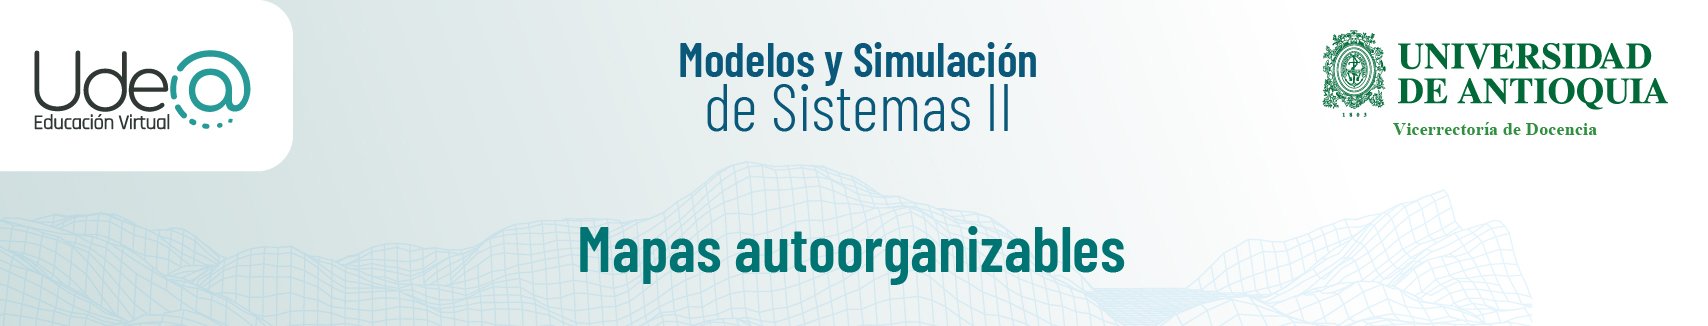

In [ ]:
from IPython.display import Image

Los mapas autoorganizables (Self-Organizing Maps - SOM), son un tipo de red neuronal que permite resolver problemas no supervisados. Los SOM están basados en un concepto conocido como <i>aprendizaje competitivo</i> en el cual las neuronas de la capa de salida compiten entre ellas por estar activadas o "despedidas". Solo una neurona de salida puede estar activada en un determinado tiempo.

Existen dos tipos de mapas:
<ul>
<li>Modelo de Willshaw-von der Malsburg.</li>
<li>Modelo de Kohonen (figura anterior).</li>
</ul>

El modelo de Kohonen ha sido más utilizado, ya que el modelo de Willshaw-von der Malsburg está diseñado para modelar problemas en los que el número de entradas es igual al número de salidas. Por otro lado, el modelo de Kohonen captura los elementos esenciales de los mapas corticales, a partir de los cuales se inspiraron este tipo de RNA.

El entrenamiento de la red responsable de la conformación de los mapas tiene tres fases principales (o cuatro, si consideramos la inicialización de los pesos de la red para lo cual usamos un generador de números aleatorios):

<ul>
<li><b>Competición</b>: dada una muestra $\bf{x}$, en esta etapa se debe determinar la neurona ganadora.</li>
<li><b>Cooperación</b>: teniendo en cuenta la neurona ganadora, se define la vecindad de las neuronas excitadas, lo que permite generar el mapa topográfico.</li>
<li><b>Adaptación sináptica</b>: es el paso de adaptación en el que se reajustan los pesos de la red para favorecer las neuronas activadas.</li>
</ul>


Veamos un ejemplo:

In [ ]:
#Se debe instalar la siguiente libreria
!pip install git+https://github.com/sevamoo/SOMPY.git

In [ ]:
#from mvpa2.suite import *
import numpy as np
colors = np.array(
         [[0., 0., 0.],
          [0., 0., 1.],
          [0., 0., 0.5],
          [0.125, 0.529, 1.0],
          [0.33, 0.4, 0.67],
          [0.6, 0.5, 1.0],
          [0., 1., 0.],
          [1., 0., 0.],
          [0., 1., 1.],
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.],
          [.33, .33, .33],
          [.5, .5, .5],
          [.66, .66, .66]])

# store the names of the colors for visualization later on
color_names = \
        ['black', 'blue', 'darkblue', 'skyblue',
         'greyblue', 'lilac', 'green', 'red',
         'cyan', 'violet', 'yellow', 'white',
         'darkgrey', 'mediumgrey', 'lightgrey']

In [ ]:
import sompy

In [ ]:
sm = sompy.SOMFactory().build(colors, [20, 30], normalization = 'var', initialization='random', neighborhood = 'gaussian', component_names=['R','G','B'])
sm.train(n_job=4, verbose=False, train_len_factor=0.5, train_rough_len=2, train_finetune_len=100)

In [ ]:
from sompy.visualization.mapview import View2D
view2D  = View2D(50,50,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [ ]:
codebook = sm._normalizer.denormalize_by(sm.data_raw, sm.codebook.matrix)
mp = codebook.reshape(sm.codebook.mapsize[0],sm.codebook.mapsize[1],codebook.shape[1])
mp.shape

Definiendo un SOM con una cuadrícula de 20x40 neuronas de salida y 400 iteraciones.

In [ ]:
import matplotlib.pyplot as plt
#som = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)
#som.train(colors)
Neurons = np.arange(sm.codebook.matrix.shape[0]).reshape(sm.codebook.mapsize[0],sm.codebook.mapsize[1])
plt.figure(figsize=(15,8))
plt.imshow(mp, origin='lower')
mapped = sm.project_data(colors)

plt.title('Color SOM')
# SOM's kshape is (rows x columns), while matplotlib wants (X x Y)
for i,j in enumerate(mapped):
    m = np.asarray(np.where(Neurons == j)).flatten()
    plt.text(m[1], m[0], color_names[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))


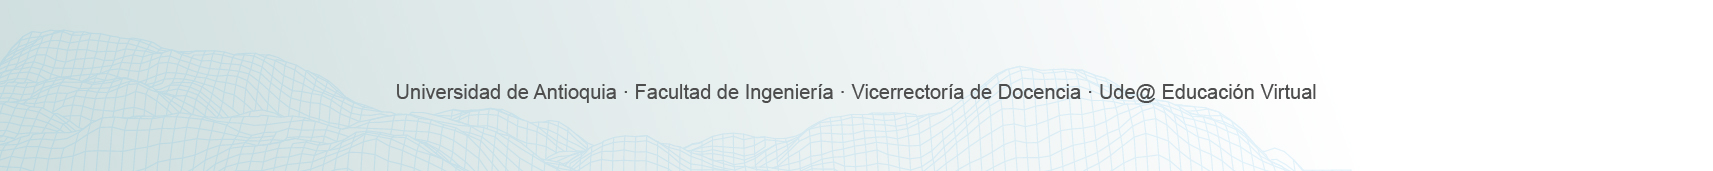